In [1]:
import numpy as np
import os

# DataFrames
import pandas as pd

# Visualisations
import matplotlib.pyplot as plt
import seaborn as sns

# ML
from joblib import load
from sklearn.metrics import mean_squared_error, r2_score

# 1. Préparation des données

### a. Import du dataset et inspection rapide

In [2]:
df = pd.read_csv("../data/bordeaux_2022.csv")

In [3]:
df.head()

Identifiant de document  Reference document  1 Articles CGI  \
0                      NaN                 NaN             NaN   
1                      NaN                 NaN             NaN   
2                      NaN                 NaN             NaN   
3                      NaN                 NaN             NaN   
4                      NaN                 NaN             NaN   

   2 Articles CGI  3 Articles CGI  4 Articles CGI  5 Articles CGI  \
0             NaN             NaN             NaN             NaN   
1             NaN             NaN             NaN             NaN   
2             NaN             NaN             NaN             NaN   
3             NaN             NaN             NaN             NaN   
4             NaN             NaN             NaN             NaN   

   No disposition Date mutation Nature mutation  ...  Nombre de lots  \
0               1    04/01/2022           Vente  ...               0   
1               1    05/01/2022           Vente  ...               1   
2               1    07/01/2022           Vente  ...               1   
3               1    07/01/2022           Vente  ...               1   
4               1    07/01/2022           Vente  ...               1   

   Code type local   Type local Identifiant local Surface reelle bati  \
0              1.0       Maison               NaN                71.0   
1              2.0  Appartement               NaN                40.0   
2              3.0   Dépendance               NaN                 0.0   
3              2.0  Appartement               NaN                35.0   
4              3.0   Dépendance               NaN                 0.0   

  Nombre pieces principales  Nature culture Nature culture speciale  \
0                       4.0               S                     NaN   
1                       1.0             NaN                     NaN   
2                       0.0             NaN                     NaN   
3                       1.0             NaN                     NaN   
4                       0.0             NaN                     NaN   

   Surface terrain      prix_m2  
0             70.0  5577.464789  
1              NaN  3962.500000  
2              NaN          inf  
3              NaN  5342.857143  
4              NaN          inf  

[5 rows x 44 columns]

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13200 entries, 0 to 13199
Data columns (total 44 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Identifiant de document     0 non-null      float64
 1   Reference document          0 non-null      float64
 2   1 Articles CGI              0 non-null      float64
 3   2 Articles CGI              0 non-null      float64
 4   3 Articles CGI              0 non-null      float64
 5   4 Articles CGI              0 non-null      float64
 6   5 Articles CGI              0 non-null      float64
 7   No disposition              13200 non-null  int64  
 8   Date mutation               13200 non-null  object 
 9   Nature mutation             13200 non-null  object 
 10  Valeur fonciere             13200 non-null  float64
 11  No voie                     13155 non-null  float64
 12  B/T/Q                       402 non-null    object 
 13  Type de voie                131

### b. Filtre des biens de 4 pièces uniquement

In [5]:
df = df[df["Nombre pieces principales"] == 4.0]

### c. Création de datasets spécifiques maisons / appartements

In [6]:
df_maisons = df[df["Type local"] == "Maison"]

In [7]:
df_appartements = df[df["Type local"] == "Appartement"]

### d. Sélection des colonnes utiles

In [8]:
colonnes_utiles = ["Surface reelle bati", "Nombre pieces principales", "Type local", "Surface terrain", "Nombre de lots", "Valeur fonciere", "prix_m2"]

df_maisons = df_maisons[colonnes_utiles]
df_appartements = df_appartements[colonnes_utiles]

### e. Vérification des données

In [9]:
df_maisons.head()

Surface reelle bati  Nombre pieces principales Type local  \
0                   71.0                        4.0     Maison   
31                  92.0                        4.0     Maison   
48                 129.0                        4.0     Maison   
75                 115.0                        4.0     Maison   
141                120.0                        4.0     Maison   

     Surface terrain  Nombre de lots  Valeur fonciere      prix_m2  
0               70.0               0         396000.0  5577.464789  
31             121.0               0         530000.0  5760.869565  
48             175.0               0         700000.0  5426.356589  
75             362.0               0         540000.0  4695.652174  
141             50.0               0         555000.0  4625.000000

In [10]:
df_maisons.shape

(408, 7)

In [11]:
df_maisons.describe()

Surface reelle bati  Nombre pieces principales  Surface terrain  \
count           408.000000                      408.0       386.000000   
mean            100.134804                        4.0       204.295337   
std              26.013963                        0.0       129.491536   
min              42.000000                        4.0        38.000000   
25%              82.000000                        4.0       116.250000   
50%              96.000000                        4.0       166.000000   
75%             115.000000                        4.0       251.750000   
max             210.000000                        4.0       973.000000   

       Nombre de lots  Valeur fonciere       prix_m2  
count      408.000000     4.080000e+02    408.000000  
mean         0.071078     5.505339e+05   5509.101169  
std          0.324808     2.875424e+05   2308.811392  
min          0.000000     6.862000e+03     70.742268  
25%          0.000000     4.000000e+05   4470.616883  
50%          0.000000     5.100000e+05   5267.942584  
75%          0.000000     6.394375e+05   6205.833727  
max          3.000000     3.663324e+06  32708.245536

In [12]:
df_appartements.head()

Surface reelle bati  Nombre pieces principales   Type local  \
13                 108.0                        4.0  Appartement   
23                  75.0                        4.0  Appartement   
57                  64.0                        4.0  Appartement   
110                 68.0                        4.0  Appartement   
136                126.0                        4.0  Appartement   

     Surface terrain  Nombre de lots  Valeur fonciere      prix_m2  
13               NaN               2         680000.0  6296.296296  
23               NaN               1         301300.0  4017.333333  
57               NaN               2         190500.0  2976.562500  
110              NaN               1         253000.0  3720.588235  
136              NaN               1         528000.0  4190.476190

In [13]:
df_appartements.shape

(663, 7)

In [14]:
df_appartements.describe()

Surface reelle bati  Nombre pieces principales  Surface terrain  \
count           663.000000                      663.0        61.000000   
mean             91.923077                        4.0       832.901639   
std              22.766352                        0.0      2321.583746   
min              30.000000                        4.0        61.000000   
25%              77.000000                        4.0       140.000000   
50%              87.000000                        4.0       249.000000   
75%             102.000000                        4.0       400.000000   
max             252.000000                        4.0     10897.000000   

       Nombre de lots  Valeur fonciere       prix_m2  
count      663.000000     6.630000e+02    663.000000  
mean         1.212670     4.952183e+05   5259.647304  
std          0.678782     5.422770e+05   5360.727387  
min          0.000000     1.000000e+00      0.008333  
25%          1.000000     2.728750e+05   3344.830380  
50%          1.000000     3.631600e+05   4165.951220  
75%          2.000000     5.225000e+05   5279.625524  
max          6.000000     7.500000e+06  68181.818182

Au vu des résultats, tout comme pour Lille je peux remplacer les valeurs manquantes dans le dataset des maisons par la médiane, et supprimer la colonne *Surface terrain* pour les appartements.

### f. Traitement des données

Maison : Remplacement des valeurs manquantes par la médiane

In [15]:
df_maisons["Surface terrain"] = df_maisons["Surface terrain"].fillna(df_maisons["Surface terrain"].median())

In [16]:
df_maisons.describe()

Surface reelle bati  Nombre pieces principales  Surface terrain  \
count           408.000000                      408.0       408.000000   
mean            100.134804                        4.0       202.230392   
std              26.013963                        0.0       126.240540   
min              42.000000                        4.0        38.000000   
25%              82.000000                        4.0       119.000000   
50%              96.000000                        4.0       166.000000   
75%             115.000000                        4.0       244.250000   
max             210.000000                        4.0       973.000000   

       Nombre de lots  Valeur fonciere       prix_m2  
count      408.000000     4.080000e+02    408.000000  
mean         0.071078     5.505339e+05   5509.101169  
std          0.324808     2.875424e+05   2308.811392  
min          0.000000     6.862000e+03     70.742268  
25%          0.000000     4.000000e+05   4470.616883  
50%          0.000000     5.100000e+05   5267.942584  
75%          0.000000     6.394375e+05   6205.833727  
max          3.000000     3.663324e+06  32708.245536

Appartements : suppression de la colonne Surface terrain

In [17]:
df_appartements = df_appartements.drop(columns=["Surface terrain"])

In [18]:
df_appartements.describe()

Surface reelle bati  Nombre pieces principales  Nombre de lots  \
count           663.000000                      663.0      663.000000   
mean             91.923077                        4.0        1.212670   
std              22.766352                        0.0        0.678782   
min              30.000000                        4.0        0.000000   
25%              77.000000                        4.0        1.000000   
50%              87.000000                        4.0        1.000000   
75%             102.000000                        4.0        2.000000   
max             252.000000                        4.0        6.000000   

       Valeur fonciere       prix_m2  
count     6.630000e+02    663.000000  
mean      4.952183e+05   5259.647304  
std       5.422770e+05   5360.727387  
min       1.000000e+00      0.008333  
25%       2.728750e+05   3344.830380  
50%       3.631600e+05   4165.951220  
75%       5.225000e+05   5279.625524  
max       7.500000e+06  68181.818182

# 2. Boxplots et outliers

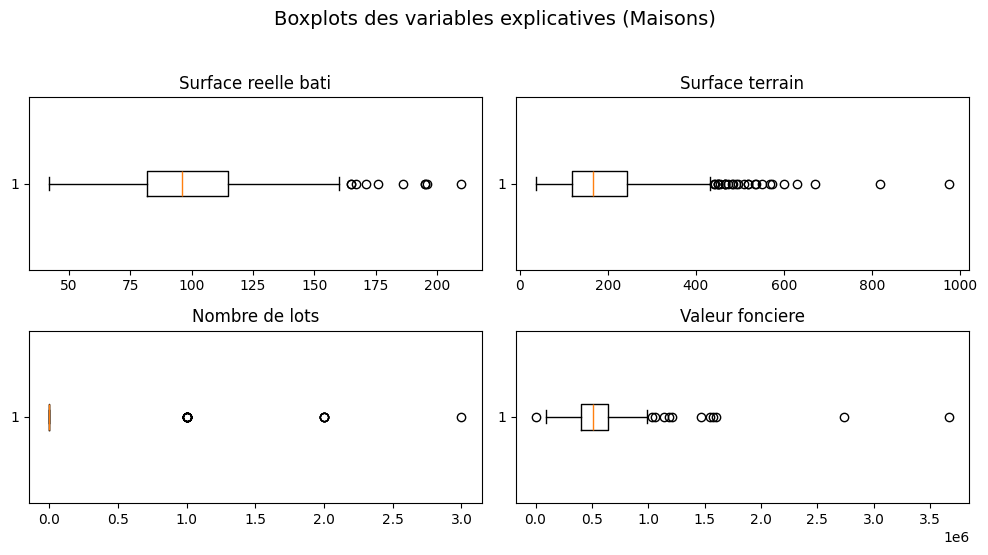

In [19]:
# On retire la target (valeur_m2) si elle est dans les colonnes
features = df_maisons.drop(columns=["Type local", "Nombre pieces principales", "prix_m2"]).select_dtypes(include='number').columns

# Taille de la grille (adapter selon ton nombre de features)
n_cols = 2
n_rows = (len(features) + n_cols - 1) // n_cols

plt.figure(figsize=(10, 5))

for i, feature in enumerate(features, 1):
    plt.subplot(n_rows, n_cols, i)
    plt.boxplot(x=df_maisons[feature], vert=False)
    plt.title(f"{feature}")
    plt.xlabel("")  # Optionnel : masque l'axe x si c'est surchargé

plt.tight_layout()
plt.suptitle("Boxplots des variables explicatives (Maisons)", fontsize=14, y=1.1)
plt.show()

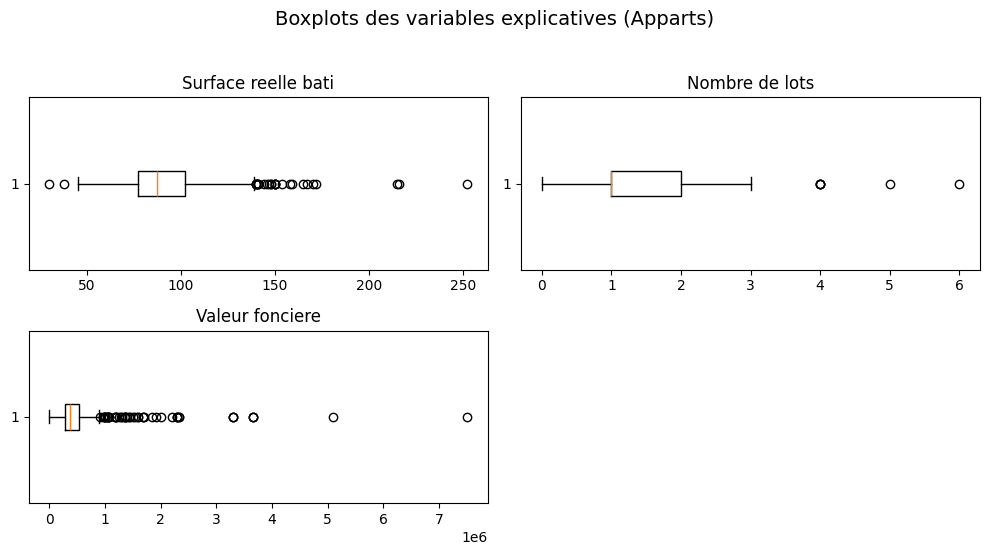

In [20]:
# On retire la target (valeur_m2) si elle est dans les colonnes
features = df_appartements.drop(columns=["Type local", "Nombre pieces principales", "prix_m2"]).select_dtypes(include='number').columns

# Taille de la grille (adapter selon ton nombre de features)
n_cols = 2
n_rows = (len(features) + n_cols - 1) // n_cols

plt.figure(figsize=(10, 5))

for i, feature in enumerate(features, 1):
    plt.subplot(n_rows, n_cols, i)
    plt.boxplot(x=df_appartements[feature], vert=False)
    plt.title(f"{feature}")
    plt.xlabel("")  # Optionnel : masque l'axe x si c'est surchargé

plt.tight_layout()
plt.suptitle("Boxplots des variables explicatives (Apparts)", fontsize=14, y=1.1)
plt.show()

In [21]:
def detect_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    return (
        lower_bound, 
        upper_bound, 
        df[(df[column] < lower_bound) | (df[column] > upper_bound)]
        )

Pour les maisons :

In [22]:
print("Surface reelle bati :")
display(detect_outliers(df_maisons, "Surface reelle bati")[2])

print("Outliers Surface terrain :")
display(detect_outliers(df_maisons, "Surface terrain")[2])

print("Outliers Nombre de lots :")
display(detect_outliers(df_maisons, "Nombre de lots")[2])

print("Outliers Valeur fonciere :")
display(detect_outliers(df_maisons, "Valeur fonciere")[2])

print("Outliers prix_m2 :")
display(detect_outliers(df_maisons, "prix_m2")[2])

Surface reelle bati :


Surface reelle bati  Nombre pieces principales Type local  \
530                  195.0                        4.0     Maison   
1182                 176.0                        4.0     Maison   
6239                 171.0                        4.0     Maison   
7124                 186.0                        4.0     Maison   
7261                 165.0                        4.0     Maison   
8301                 165.0                        4.0     Maison   
8464                 196.0                        4.0     Maison   
10413                210.0                        4.0     Maison   
10713                195.0                        4.0     Maison   
12099                167.0                        4.0     Maison   

       Surface terrain  Nombre de lots  Valeur fonciere       prix_m2  
530              466.0               0        2731800.0  14009.230769  
1182             473.0               0        1206400.0   6854.545455  
6239             379.0               0         847600.0   4956.725146  
7124             166.0               2         912400.0   4905.376344  
7261             239.0               0         738000.0   4472.727273  
8301             164.0               0         795000.0   4818.181818  
8464             357.0               0        1598000.0   8153.061224  
10413            194.0               0         960000.0   4571.428571  
10713            229.0               0         892000.0   4574.358974  
12099            518.0               0         420000.0   2514.970060

Outliers Surface terrain :


Surface reelle bati  Nombre pieces principales Type local  \
530                  195.0                        4.0     Maison   
804                   77.0                        4.0     Maison   
968                   85.0                        4.0     Maison   
1182                 176.0                        4.0     Maison   
1242                 128.0                        4.0     Maison   
2839                  98.0                        4.0     Maison   
3572                 116.0                        4.0     Maison   
4381                 140.0                        4.0     Maison   
4486                 141.0                        4.0     Maison   
4808                  72.0                        4.0     Maison   
5752                  90.0                        4.0     Maison   
6011                 120.0                        4.0     Maison   
6669                  80.0                        4.0     Maison   
6971                 129.0                        4.0     Maison   
7017                  82.0                        4.0     Maison   
7063                  96.0                        4.0     Maison   
7271                 120.0                        4.0     Maison   
7329                  82.0                        4.0     Maison   
8200                  98.0                        4.0     Maison   
8609                  85.0                        4.0     Maison   
9059                  83.0                        4.0     Maison   
9815                  80.0                        4.0     Maison   
11142                126.0                        4.0     Maison   
12047                123.0                        4.0     Maison   
12099                167.0                        4.0     Maison   
12689                 94.0                        4.0     Maison   
13105                 54.0                        4.0     Maison   

       Surface terrain  Nombre de lots  Valeur fonciere       prix_m2  
530              466.0               0        2731800.0  14009.230769  
804              443.0               0         490000.0   6363.636364  
968              467.0               0         875000.0  10294.117647  
1182             473.0               0        1206400.0   6854.545455  
1242             467.0               0         990000.0   7734.375000  
2839             490.0               0         595000.0   6071.428571  
3572             484.0               0         565000.0   4870.689655  
4381             536.0               0         839369.0   5995.492857  
4486             599.0               0         945050.0   6702.482270  
4808             519.0               0         400000.0   5555.555556  
5752             568.0               1         510000.0   5666.666667  
6011             510.0               0         527000.0   4391.666667  
6669             450.0               0         481000.0   6012.500000  
6971             481.0               0         955000.0   7403.100775  
7017             454.0               0         610000.0   7439.024390  
7063             630.0               0         361000.0   3760.416667  
7271             496.0               0         774500.0   6454.166667  
7329             549.0               0         416000.0   5073.170732  
8200             451.0               0         386000.0   3938.775510  
8609             670.0               0         640000.0   7529.411765  
9059             572.0               0         630000.0   7590.361446  
9815             449.0               0         479560.0   5994.500000  
11142            534.0               0         710000.0   5634.920635  
12047            973.0               0         700000.0   5691.056911  
12099            518.0               0         420000.0   2514.970060  
12689            817.0               0         350000.0   3723.404255  
13105            440.0               0         470000.0   8703.703704

Outliers Nombre de lots :


Surface reelle bati  Nombre pieces principales Type local  \
782                  107.0                        4.0     Maison   
1657                  97.0                        4.0     Maison   
1738                 115.0                        4.0     Maison   
2188                 105.0                        4.0     Maison   
4391                 107.0                        4.0     Maison   
5170                  74.0                        4.0     Maison   
5752                  90.0                        4.0     Maison   
6452                  76.0                        4.0     Maison   
6692                 110.0                        4.0     Maison   
6928                  81.0                        4.0     Maison   
7124                 186.0                        4.0     Maison   
8428                  88.0                        4.0     Maison   
9021                  82.0                        4.0     Maison   
9442                  93.0                        4.0     Maison   
11437                 79.0                        4.0     Maison   
11597                 86.0                        4.0     Maison   
12564                 95.0                        4.0     Maison   
12733                105.0                        4.0     Maison   
12748                 92.0                        4.0     Maison   
12813                 92.0                        4.0     Maison   
12914                 80.0                        4.0     Maison   
12952                 92.0                        4.0     Maison   

       Surface terrain  Nombre de lots  Valeur fonciere      prix_m2  
782              166.0               1         425000.0  3971.962617  
1657             166.0               1         440000.0  4536.082474  
1738             166.0               1         449000.0  3904.347826  
2188             166.0               1         442300.0  4212.380952  
4391             166.0               2         411500.0  3845.794393  
5170             166.0               1         375000.0  5067.567568  
5752             568.0               1         510000.0  5666.666667  
6452             166.0               3         336000.0  4421.052632  
6692             166.0               1         524000.0  4763.636364  
6928             166.0               1         391400.0  4832.098765  
7124             166.0               2         912400.0  4905.376344  
8428             166.0               2         456810.0  5191.022727  
9021             166.0               1         325450.0  3968.902439  
9442             166.0               1         332500.0  3575.268817  
11437            166.0               2         301870.0  3821.139241  
11597            166.0               2         422000.0  4906.976744  
12564            166.0               1         426600.0  4490.526316  
12733            166.0               1         491970.0  4685.428571  
12748            166.0               1         437130.0  4751.413043  
12813            166.0               1         457000.0  4967.391304  
12914            166.0               1         424300.0  5303.750000  
12952            166.0               1         330000.0  3586.956522

Outliers Valeur fonciere :


Surface reelle bati  Nombre pieces principales Type local  \
530                  195.0                        4.0     Maison   
1182                 176.0                        4.0     Maison   
2678                 149.0                        4.0     Maison   
4893                 150.0                        4.0     Maison   
5484                  80.0                        4.0     Maison   
6447                 140.0                        4.0     Maison   
8464                 196.0                        4.0     Maison   
9027                  97.0                        4.0     Maison   
9671                 142.0                        4.0     Maison   
11776                108.0                        4.0     Maison   
13043                 90.0                        4.0     Maison   
13065                112.0                        4.0     Maison   

       Surface terrain  Nombre de lots  Valeur fonciere       prix_m2  
530              466.0               0        2731800.0  14009.230769  
1182             473.0               0        1206400.0   6854.545455  
2678             246.0               0        1056900.0   7093.288591  
4893             252.0               0        1180000.0   7866.666667  
5484             154.0               0        1550000.0  19375.000000  
6447             236.0               0        1570000.0  11214.285714  
8464             357.0               0        1598000.0   8153.061224  
9027              97.0               0           6862.0     70.742268  
9671             258.0               0        1030000.0   7253.521127  
11776             77.0               0        1470000.0  13611.111111  
13043            222.0               0        1141511.4  12683.460000  
13065            140.0               0        3663323.5  32708.245536

Outliers prix_m2 :


Surface reelle bati  Nombre pieces principales Type local  \
530                  195.0                        4.0     Maison   
631                   83.0                        4.0     Maison   
968                   85.0                        4.0     Maison   
1103                  68.0                        4.0     Maison   
1786                  75.0                        4.0     Maison   
3527                  82.0                        4.0     Maison   
3750                  95.0                        4.0     Maison   
4132                  87.0                        4.0     Maison   
5484                  80.0                        4.0     Maison   
5624                  91.0                        4.0     Maison   
6108                  75.0                        4.0     Maison   
6447                 140.0                        4.0     Maison   
6689                  68.0                        4.0     Maison   
9027                  97.0                        4.0     Maison   
9220                  80.0                        4.0     Maison   
10043                 90.0                        4.0     Maison   
11776                108.0                        4.0     Maison   
12497                 84.0                        4.0     Maison   
13016                110.0                        4.0     Maison   
13043                 90.0                        4.0     Maison   
13065                112.0                        4.0     Maison   
13107                 55.0                        4.0     Maison   

       Surface terrain  Nombre de lots  Valeur fonciere       prix_m2  
530              466.0               0        2731800.0  14009.230769  
631              191.0               0         858000.0  10337.349398  
968              467.0               0         875000.0  10294.117647  
1103             165.0               0         750000.0  11029.411765  
1786              80.0               0         750000.0  10000.000000  
3527              96.0               0          92351.0   1126.231707  
3750             169.0               0         137100.0   1443.157895  
4132              96.0               0         159123.0   1829.000000  
5484             154.0               0        1550000.0  19375.000000  
5624             145.0               0         887000.0   9747.252747  
6108             397.0               0          99995.0   1333.266667  
6447             236.0               0        1570000.0  11214.285714  
6689             125.0               0         613850.0   9027.205882  
9027              97.0               0           6862.0     70.742268  
9220             340.0               0         831250.0  10390.625000  
10043            123.0               0         850000.0   9444.444444  
11776             77.0               0        1470000.0  13611.111111  
12497            120.0               0         150000.0   1785.714286  
13016            223.0               0         111500.0   1013.636364  
13043            222.0               0        1141511.4  12683.460000  
13065            140.0               0        3663323.5  32708.245536  
13107            220.0               0         570000.0  10363.636364

In [23]:
lower_bound, upper_bound, _ = detect_outliers(df_maisons, "Surface reelle bati")
df_maisons = df_maisons[~((df_maisons["Surface reelle bati"] < lower_bound) | (df_maisons["Surface reelle bati"] > upper_bound))]

lower_bound, upper_bound, _ = detect_outliers(df_maisons, "Surface terrain")
df_maisons = df_maisons[~((df_maisons["Surface terrain"] < lower_bound) | (df_maisons["Surface terrain"] > upper_bound))]

lower_bound, upper_bound, _ = detect_outliers(df_maisons, "Valeur fonciere")
df_maisons = df_maisons[~((df_maisons["Valeur fonciere"] < lower_bound) | (df_maisons["Valeur fonciere"] > upper_bound))]

lower_bound, upper_bound, _ = detect_outliers(df_maisons, "prix_m2")
df_maisons = df_maisons[~((df_maisons["prix_m2"] < lower_bound) | (df_maisons["prix_m2"] > upper_bound))]

In [24]:
df_maisons.describe()

Surface reelle bati  Nombre pieces principales  Surface terrain  \
count           343.000000                      343.0       343.000000   
mean             98.478134                        4.0       174.335277   
std              22.066592                        0.0        84.044413   
min              45.000000                        4.0        38.000000   
25%              82.500000                        4.0       113.000000   
50%              96.000000                        4.0       161.000000   
75%             113.000000                        4.0       221.500000   
max             160.000000                        4.0       422.000000   

       Nombre de lots  Valeur fonciere      prix_m2  
count      343.000000       343.000000   343.000000  
mean         0.075802    511766.516618  5211.771889  
std          0.333461    164007.377933  1230.642706  
min          0.000000    170000.000000  2051.548387  
25%          0.000000    399500.000000  4441.038204  
50%          0.000000    495200.000000  5217.391304  
75%          0.000000    607458.000000  6000.000000  
max          3.000000    938500.000000  8487.500000

Pour les appartements :

In [25]:
print("Surface reelle bati :")
display(detect_outliers(df_appartements, "Surface reelle bati")[2])

print("Outliers Nombre de lots :")
display(detect_outliers(df_appartements, "Nombre de lots")[2])

print("Outliers Valeur fonciere :")
display(detect_outliers(df_appartements, "Valeur fonciere")[2])

print("Outliers prix_m2 :")
display(detect_outliers(df_appartements, "prix_m2")[2])

Surface reelle bati :


Surface reelle bati  Nombre pieces principales   Type local  \
938                  147.0                        4.0  Appartement   
1080                 159.0                        4.0  Appartement   
1574                 148.0                        4.0  Appartement   
1615                 141.0                        4.0  Appartement   
2338                 150.0                        4.0  Appartement   
3296                 140.0                        4.0  Appartement   
3606                 215.0                        4.0  Appartement   
3893                 158.0                        4.0  Appartement   
4203                  38.0                        4.0  Appartement   
4478                 252.0                        4.0  Appartement   
4669                 170.0                        4.0  Appartement   
4993                 150.0                        4.0  Appartement   
6199                 167.0                        4.0  Appartement   
6354                 165.0                        4.0  Appartement   
6951                 148.0                        4.0  Appartement   
7798                 144.0                        4.0  Appartement   
8274                 150.0                        4.0  Appartement   
8363                 140.0                        4.0  Appartement   
8531                 150.0                        4.0  Appartement   
8795                 141.0                        4.0  Appartement   
9335                 216.0                        4.0  Appartement   
9742                 154.0                        4.0  Appartement   
10049                141.0                        4.0  Appartement   
10813                 30.0                        4.0  Appartement   
11041                140.0                        4.0  Appartement   
11928                146.0                        4.0  Appartement   
12481                140.0                        4.0  Appartement   
13058                172.0                        4.0  Appartement   

       Nombre de lots  Valeur fonciere       prix_m2  
938                 3         620000.0   4217.687075  
1080                1        1028350.0   6467.610063  
1574                1         140000.0    945.945946  
1615                1         749000.0   5312.056738  
2338                2        2000000.0  13333.333333  
3296                1        1910800.0  13648.571429  
3606                1        1690000.0   7860.465116  
3893                1        1170200.0   7406.329114  
4203                1         125000.0   3289.473684  
4478                4        1453702.0   5768.658730  
4669                6        1600000.0   9411.764706  
4993                2         661100.0   4407.333333  
6199                1        1201550.0   7194.910180  
6354                1         954600.0   5785.454545  
6951                1        1288467.0   8705.858108  
7798                1         985000.0   6840.277778  
8274                1         704808.0   4698.720000  
8363                2         655000.0   4678.571429  
8531                0        2200000.0  14666.666667  
8795                1         862400.0   6116.312057  
9335                1        1390000.0   6435.185185  
9742                1        1680000.0  10909.090909  
10049               1         478000.0   3390.070922  
10813               1         168000.0   5600.000000  
11041               2         325000.0   2321.428571  
11928               2         510000.0   3493.150685  
12481               1         619000.0   4421.428571  
13058               0        3663323.5  21298.392442

Outliers Nombre de lots :


Surface reelle bati  Nombre pieces principales   Type local  \
2818                  70.0                        4.0  Appartement   
4478                 252.0                        4.0  Appartement   
4669                 170.0                        4.0  Appartement   
9033                  72.0                        4.0  Appartement   
9731                 117.0                        4.0  Appartement   
11515                 95.0                        4.0  Appartement   

       Nombre de lots  Valeur fonciere      prix_m2  
2818                4         403000.0  5757.142857  
4478                4        1453702.0  5768.658730  
4669                6        1600000.0  9411.764706  
9033                4         470000.0  6527.777778  
9731                4         647000.0  5529.914530  
11515               5         401000.0  4221.052632

Outliers Valeur fonciere :


Surface reelle bati  Nombre pieces principales   Type local  \
1080                 159.0                        4.0  Appartement   
1398                 120.0                        4.0  Appartement   
2338                 150.0                        4.0  Appartement   
3296                 140.0                        4.0  Appartement   
3606                 215.0                        4.0  Appartement   
3718                  90.0                        4.0  Appartement   
3893                 158.0                        4.0  Appartement   
3923                 105.0                        4.0  Appartement   
4423                  80.0                        4.0  Appartement   
4478                 252.0                        4.0  Appartement   
4499                 139.0                        4.0  Appartement   
4573                 104.0                        4.0  Appartement   
4574                 109.0                        4.0  Appartement   
4669                 170.0                        4.0  Appartement   
4710                 110.0                        4.0  Appartement   
5707                 120.0                        4.0  Appartement   
5798                 115.0                        4.0  Appartement   
5937                 130.0                        4.0  Appartement   
5944                 124.0                        4.0  Appartement   
6199                 167.0                        4.0  Appartement   
6354                 165.0                        4.0  Appartement   
6489                 112.0                        4.0  Appartement   
6951                 148.0                        4.0  Appartement   
7286                  80.0                        4.0  Appartement   
7798                 144.0                        4.0  Appartement   
8531                 150.0                        4.0  Appartement   
8707                 106.0                        4.0  Appartement   
8981                  62.0                        4.0  Appartement   
9314                  67.0                        4.0  Appartement   
9335                 216.0                        4.0  Appartement   
9742                 154.0                        4.0  Appartement   
9948                 109.0                        4.0  Appartement   
10260                110.0                        4.0  Appartement   
10472                110.0                        4.0  Appartement   
10473                110.0                        4.0  Appartement   
10474                110.0                        4.0  Appartement   
10686                 99.0                        4.0  Appartement   
11202                 45.0                        4.0  Appartement   
11453                132.0                        4.0  Appartement   
12153                 60.0                        4.0  Appartement   
12155                 68.0                        4.0  Appartement   
12157                 68.0                        4.0  Appartement   
12189                 85.0                        4.0  Appartement   
12190                 84.0                        4.0  Appartement   
12191                100.0                        4.0  Appartement   
12259                 70.0                        4.0  Appartement   
12261                100.0                        4.0  Appartement   
12263                130.0                        4.0  Appartement   
13058                172.0                        4.0  Appartement   
13059                115.0                        4.0  Appartement   
13069                100.0                        4.0  Appartement   

       Nombre de lots  Valeur fonciere       prix_m2  
1080                1        1028350.0   6467.610063  
1398                0        1850000.0  15416.666667  
2338                2        2000000.0  13333.333333  
3296                1        1910800.0  13648.571429  
3606                1        1690000.0   7860.465116  
3718                0        1600000

Outliers prix_m2 :


Surface reelle bati  Nombre pieces principales   Type local  \
605                   63.0                        4.0  Appartement   
1311                  88.0                        4.0  Appartement   
1398                 120.0                        4.0  Appartement   
2338                 150.0                        4.0  Appartement   
3053                  81.0                        4.0  Appartement   
3296                 140.0                        4.0  Appartement   
3718                  90.0                        4.0  Appartement   
3923                 105.0                        4.0  Appartement   
4423                  80.0                        4.0  Appartement   
4573                 104.0                        4.0  Appartement   
4574                 109.0                        4.0  Appartement   
4669                 170.0                        4.0  Appartement   
4710                 110.0                        4.0  Appartement   
5707                 120.0                        4.0  Appartement   
5736                  65.0                        4.0  Appartement   
5798                 115.0                        4.0  Appartement   
5944                 124.0                        4.0  Appartement   
6489                 112.0                        4.0  Appartement   
6951                 148.0                        4.0  Appartement   
7052                  82.0                        4.0  Appartement   
7286                  80.0                        4.0  Appartement   
8531                 150.0                        4.0  Appartement   
8707                 106.0                        4.0  Appartement   
8981                  62.0                        4.0  Appartement   
9314                  67.0                        4.0  Appartement   
9742                 154.0                        4.0  Appartement   
9948                 109.0                        4.0  Appartement   
10260                110.0                        4.0  Appartement   
10272                 99.0                        4.0  Appartement   
10472                110.0                        4.0  Appartement   
10473                110.0                        4.0  Appartement   
10474                110.0                        4.0  Appartement   
10686                 99.0                        4.0  Appartement   
11202                 45.0                        4.0  Appartement   
11453                132.0                        4.0  Appartement   
12153                 60.0                        4.0  Appartement   
12155                 68.0                        4.0  Appartement   
12157                 68.0                        4.0  Appartement   
12189                 85.0                        4.0  Appartement   
12190                 84.0                        4.0  Appartement   
12191                100.0                        4.0  Appartement   
12259                 70.0                        4.0  Appartement   
12261                100.0                        4.0  Appartement   
12263                130.0                        4.0  Appartement   
12410                 70.0                        4.0  Appartement   
12467                 82.0                        4.0  Appartement   
12468                 83.0                        4.0  Appartement   
12471                 83.0                        4.0  Appartement   
12738                 58.0                        4.0  Appartement   
12779                 71.0                        4.0  Appartement   
12781                 60.0                        4.0  Appartement   
12785                 70.0                        4.0  Appartement   
12917                 47.0                        4.0  Appartement   
13058                172.0                        4.0  Appartement   
13059                115.0                        4.0  Appartement   
13069                100.0                        4.0  Appartement   
13116            

In [26]:
lower_bound, upper_bound, _ = detect_outliers(df_appartements, "Surface reelle bati")
df_appartements = df_appartements[~((df_appartements["Surface reelle bati"] < lower_bound) | (df_appartements["Surface reelle bati"] > upper_bound))]

lower_bound, upper_bound, _ = detect_outliers(df_appartements, "Nombre de lots")
df_appartements = df_appartements[~((df_appartements["Nombre de lots"] < lower_bound) | (df_appartements["Nombre de lots"] > upper_bound))]

lower_bound, upper_bound, _ = detect_outliers(df_appartements, "Valeur fonciere")
df_appartements = df_appartements[~((df_appartements["Valeur fonciere"] < lower_bound) | (df_appartements["Valeur fonciere"] > upper_bound))]

lower_bound, upper_bound, _ = detect_outliers(df_appartements, "prix_m2")
df_appartements = df_appartements[~((df_appartements["prix_m2"] < lower_bound) | (df_appartements["prix_m2"] > upper_bound))]

In [27]:
df_appartements.describe()

Surface reelle bati  Nombre pieces principales  Nombre de lots  \
count           568.000000                      568.0      568.000000   
mean             88.941901                        4.0        1.269366   
std              16.630918                        0.0        0.520797   
min              46.000000                        4.0        0.000000   
25%              76.750000                        4.0        1.000000   
50%              86.000000                        4.0        1.000000   
75%              98.000000                        4.0        2.000000   
max             138.000000                        4.0        3.000000   

       Valeur fonciere      prix_m2  
count       568.000000   568.000000  
mean     365746.273063  4059.040922  
std      138657.187888  1133.971539  
min       75400.000000   876.744186  
25%      256821.762500  3239.659091  
50%      344500.000000  4000.000000  
75%      450000.000000  4714.285714  
max      820000.000000  7187.669903

# 3. Séparation des variables explicatives et des variables cibles

In [28]:
# Pour les maisons
X_maisons = df_maisons[["Surface reelle bati", "Nombre de lots", "Surface terrain", "Nombre pieces principales"]]
y_maisons = df_maisons["prix_m2"]

# Pour les appartements
X_appartements = df_appartements[["Surface reelle bati", "Nombre de lots", "Nombre pieces principales"]]
y_appartements = df_appartements["prix_m2"]

In [29]:
print(X_maisons.shape)
print(y_maisons.shape)

(343, 4)
(343,)


# 4. Chargement du modèle et prédictions

### a. Maisons

In [30]:
# Chargement de la pipeline
pipeline_m = load("../models/modeles_maisons.joblib")

In [31]:
# Chargement du modèle sélectionné
model_m = pipeline_m["Forêt Aléatoire"]["pipeline"]

In [32]:
# Prédictions
y_pred_maisons = model_m.predict(X_maisons)

In [33]:
# Evaluations
mse_maisons = mean_squared_error(y_maisons, y_pred_maisons)
rmse_maisons = np.sqrt(mean_squared_error(y_maisons, y_pred_maisons))
r2_maisons = r2_score(y_maisons, y_pred_maisons)

print(f"Maisons - MSE : {mse_maisons:.2f}, RMSE: {rmse_maisons:.2f}, R2: {r2_maisons:.4f}")

Maisons - MSE : 7889756.16, RMSE: 2808.87, R2: -4.2248


### b. Appartements

In [34]:
# Chargement de la pipeline
pipeline_a = load("../models/modeles_apparts.joblib")

In [35]:
# Chargement du modèle sélectionné
model_a = pipeline_a["Arbre de Décision"]["pipeline"]

In [36]:
# Prédictions
y_pred_apparts = model_a.predict(X_appartements)

In [37]:
# Evaluations
mse_apparts = mean_squared_error(y_appartements, y_pred_apparts)
rmse_apparts = np.sqrt(mean_squared_error(y_appartements, y_pred_apparts))
r2_apparts = r2_score(y_appartements, y_pred_apparts)

print(f"Apparts - MSE : {mse_apparts:.2f}, RMSE: {rmse_apparts:.2f}, R2: {r2_apparts:.4f}")

Apparts - MSE : 1934956.10, RMSE: 1391.03, R2: -0.5074


# 5. Analyse des performances

Le modèle n'est pas aussi performant sur les données de Bordeaux que sur celles de Lille :  
**RMSE Maisons**    ->      Lille : *783.17*  |   Bordeaux : *2808.87*  
**RMSE Apparts**    ->      Lille : *780.33*  |   Bordeaux : *1391.03*

Ces différences peuvent être expliquées par différents facteurs, telles que le manque de données, et surtout un manque de critères d'évaluation comme la localisation (un logement près de la côte, comme Bordeaux, sera sûrement plus coûteux qu'un logement sur Lille), le nombre de pièces, etc.  

Pour améliorer les performances du modèle il devrait être entraîné en prenant en compte ces critères, avec un panel couvrant toutes les régions de France, et donc avec un plus grand nombre de données.